### 1. Convert the column of rating to a new columns of ratings_binary

In [36]:
import pandas as pd
import numpy as np
drugrev_train = pd.read_csv('/Users/mj/Desktop/DSCI 314 (Text Mining)/DrugReview/drugsComTrain_raw.tsv', sep='\t')
drugrev_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [37]:
# Initialize empty column
drugrev_train['ratings_binary'] = None

# Parse through data and add 1 or 0 to ratings_binary; rating > 5 ratings_binary = 1, rating <= 5 ratings_binary = 0
for index, row in drugrev_train.iterrows():
    if row['rating'] > 5:
        drugrev_train.loc[index, 'ratings_binary'] = 1
    else:
        drugrev_train.loc[index, 'ratings_binary'] = 0
        
drugrev_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,ratings_binary
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,1


### 2. Clean and preprocess the column of review

In [38]:
import re
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

drugrev_train['review'] = drugrev_train['review'].replace([np.inf, -np.inf], np.nan) 
# Replace "&#39" with a normal apostrophe
drugrev_train['review'] = drugrev_train['review'].str.replace('&#39;', "'", regex = False)
drugrev_train['review'] = drugrev_train['review'].str.replace('039', "'", regex = False)
# Remove all special characters, punctuation using a regular expression or nan
drugrev_train['review'] = drugrev_train['review'].str.replace(r'[^a-zA-Z\s]', '', regex = True)
# Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
drugrev_train['review'] = drugrev_train['review'].str.replace(r'\b[a-zA-Z]{1,2}\b', '', regex = True)
# Remove all rows without any text left (empty text) in the column of review
drugrev_train.dropna(subset = ['review'], inplace = True)
# Removing stop words
drugrev_train['review'] = drugrev_train['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

drugrev_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,ratings_binary
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination Bystolic Fish Oil,9.0,"May 20, 2012",27,1
1,95260,Guanfacine,ADHD,son halfway fourth week Intuniv became concern...,8.0,"April 27, 2010",192,1
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,This first time using form birth control glad ...,8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turned life around feel he...,9.0,"November 27, 2016",37,1


### 3. Extract all the tokens from the review

In [39]:
from nltk.tokenize import word_tokenize

drugrev_train['review'] = drugrev_train['review'].apply(word_tokenize)

In [41]:
drugrev_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,ratings_binary
0,206461,Valsartan,Left Ventricular Dysfunction,"[side, effect, take, combination, Bystolic, Fi...",9.0,"May 20, 2012",27,1
1,95260,Guanfacine,ADHD,"[son, halfway, fourth, week, Intuniv, became, ...",8.0,"April 27, 2010",192,1
2,92703,Lybrel,Birth Control,"[used, take, another, oral, contraceptive, pil...",5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,"[This, first, time, using, form, birth, contro...",8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"[Suboxone, completely, turned, life, around, f...",9.0,"November 27, 2016",37,1


### 4. Replace the review column with the string only containing the lemmas of all the tokens

In [42]:
from nltk.stem import WordNetLemmatizer

# Create function to lemmatize and join tokens into string
def lemmatize_text(text):    
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    return ' '.join(text).strip()
    
drugrev_train['review'] = drugrev_train['review'].apply(lemmatize_text)

In [43]:
drugrev_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,ratings_binary
0,206461,Valsartan,Left Ventricular Dysfunction,side effect take combination Bystolic Fish Oil,9.0,"May 20, 2012",27,1
1,95260,Guanfacine,ADHD,son halfway fourth week Intuniv became concern...,8.0,"April 27, 2010",192,1
2,92703,Lybrel,Birth Control,used take another oral contraceptive pill cycl...,5.0,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,This first time using form birth control glad ...,8.0,"November 3, 2015",10,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turned life around feel he...,9.0,"November 27, 2016",37,1


### 5. Graphically summarize the review

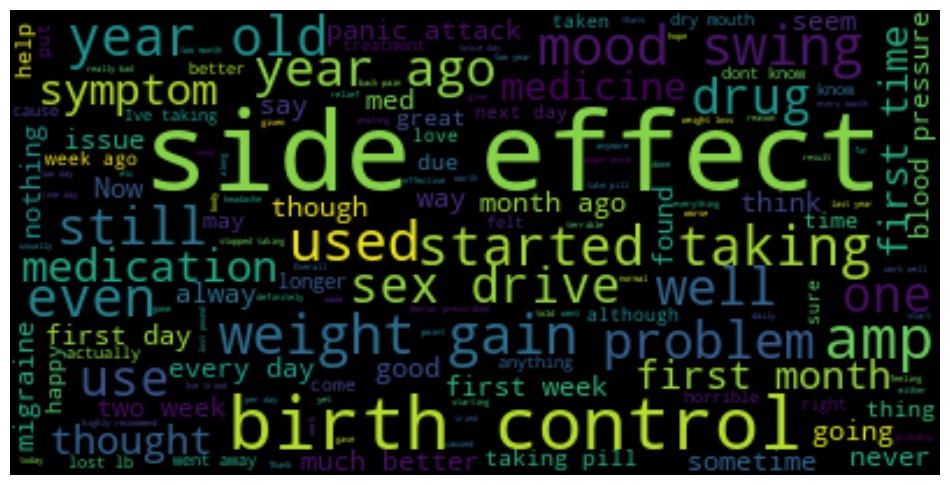

In [44]:
from wordcloud import WordCloud

# Convert the list to a string
reviews = ' '.join(drugrev_train['review'])
# Create a word cloud from tweets
wordcloud = WordCloud().generate(reviews)

# Visualize the word cloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(reviews)
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 6. Graphically summarize the length of the text of the review using:  Boxplot, Histogram, Density Plot

In [45]:
# Empty datafram that will contain column with length of reviews
drugrev_visuals = pd.DataFrame()

# Adding new column to visuals dataframe containg the length of the text of reviews column
drugrev_visuals["len_text"] = drugrev_train["review"].str.len()

Text(0.5, 1.0, 'Length of Review Text: Boxplot')

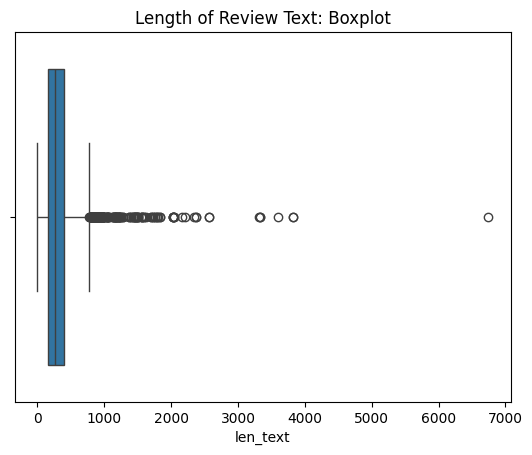

In [46]:
# Boxplot to visually demonstrate length of reviews
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = drugrev_visuals, x = "len_text").set_title("Length of Review Text: Boxplot")

Text(0.5, 1.0, 'Length of Review Text: Histogram')

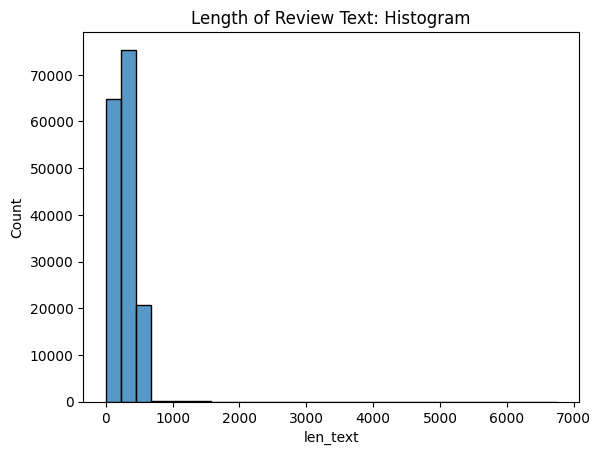

In [47]:
# Histogram to visually demonstrate length of reviews
sns.histplot(data = drugrev_visuals, x = "len_text", bins = 30).set_title("Length of Review Text: Histogram")

Text(0.5, 1.0, 'Length of Review Text: Kernel Density')

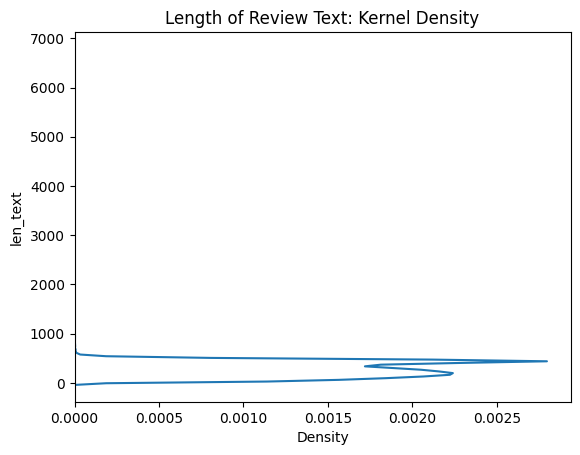

In [48]:
# Kernel density plot of length of reviews
sns.kdeplot(data = drugrev_visuals, y = "len_text").set_title("Length of Review Text: Kernel Density")

### 7. Graphically summarize the word count of the text of the review using:  Boxplot, Histogram, Density Plot

In [49]:
# Adding column to visuals datafram for word count length
drugrev_visuals["len_word"] = drugrev_train["review"].str.split().str.len()

Text(0.5, 1.0, 'Word Count of Review Text: Boxplot')

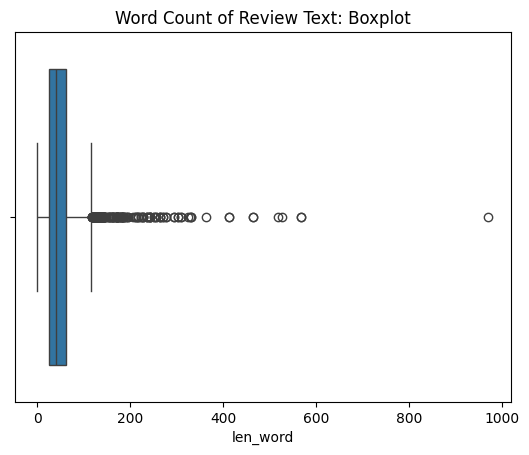

In [50]:
# Boxplot to visually demonstrate length of reviews
sns.boxplot(data = drugrev_visuals, x = "len_word").set_title("Word Count of Review Text: Boxplot")

Text(0.5, 1.0, 'Word Count of Review Text: Histogram')

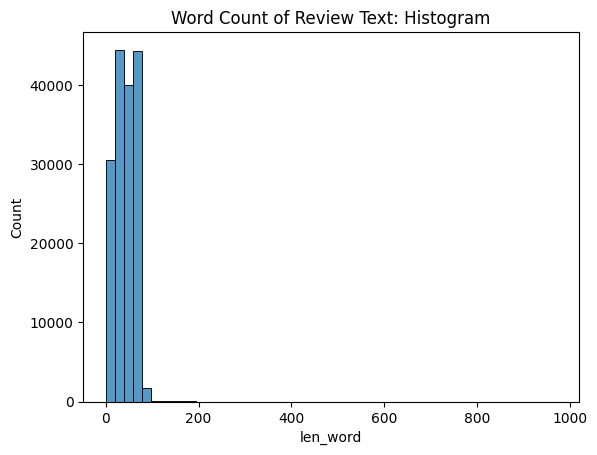

In [51]:
# Histogram to visually demonstrate length of reviews
sns.histplot(data = drugrev_visuals, x = "len_word", bins = 50).set_title("Word Count of Review Text: Histogram")

Text(0.5, 1.0, 'Word Count of Review Text: Kernel Density')

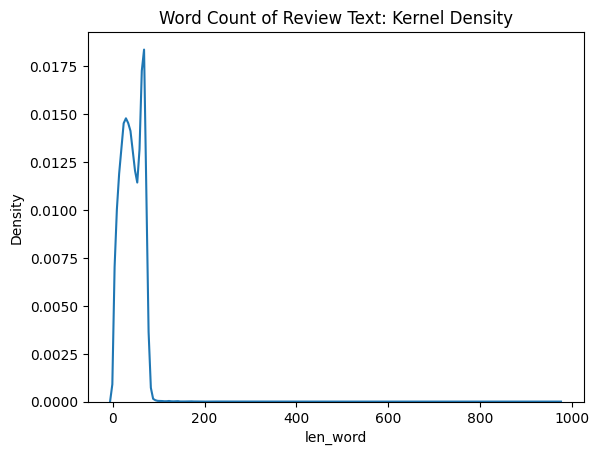

In [52]:
# Kernel density plot of length of reviews
sns.kdeplot(data = drugrev_visuals, x = "len_word").set_title("Word Count of Review Text: Kernel Density")

### 8. Graphically summarize the top 10 unigram and bigrams of the tf-idf of the text of the review

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function returning the top words for Unigram
def get_top_tf_idf_words_uni(df = drugrev_train, col = "review", use_idf = True, ngram_range = (1, 1), top_n = 5):    
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    # Fit and transform the corpus
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names_out())
    # Generate the tf-idf matrix
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    # Rank the matrix by tf-idf values and return the indices of the top_n values
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    # Return the feature names and corresponding tf_idf values in a df
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx],
    })

# Define a function returning the top words for Bigram
def get_top_tf_idf_words_bi(df = drugrev_train, col = "review", use_idf = True, ngram_range = (2, 2), top_n = 5):    
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    # Fit and transform the corpus
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names_out())
    # Generate the tf-idf matrix
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    # Rank the matrix by tf-idf values and return the indices of the top_n values
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    # Return the feature names and corresponding tf_idf values in a df
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx],
    })

In [54]:
# Generate top tf-idf words for the texts before and after cleaning
top_n = 10
top10_uni = get_top_tf_idf_words_uni(df = drugrev_train, col = "review", top_n = top_n)
top10_bi = get_top_tf_idf_words_bi(df = drugrev_train, col = "review", top_n = top_n)

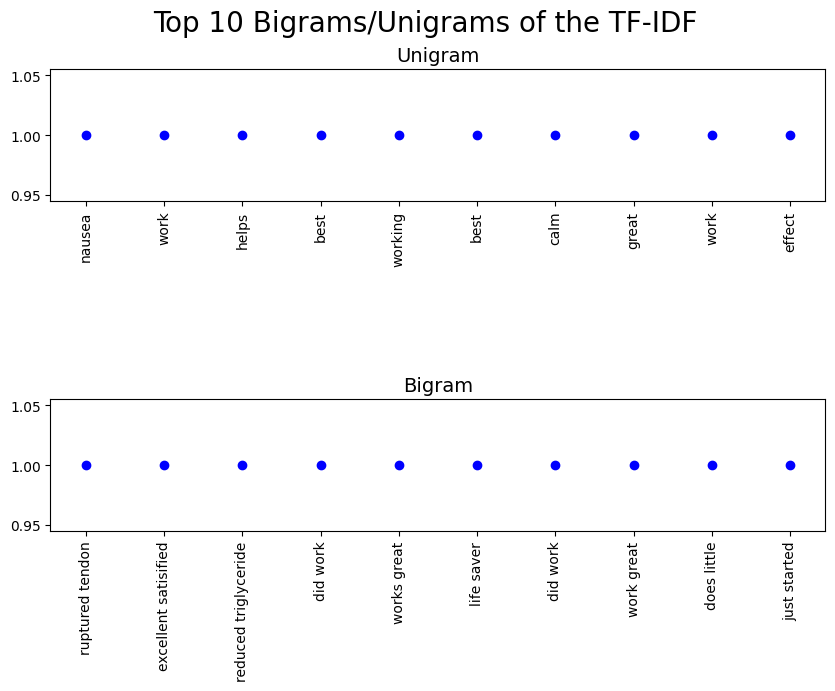

In [55]:
# Visual graphic for unigram of top 10 words
x = range(0, top_n)

fig, ax = plt.subplots(2, 1, figsize = (10, 6))

fig.suptitle('Top 10 Bigrams/Unigrams of the TF-IDF', fontsize = 20)

# Plot x and tf_idf using blue circle markers
ax[0].plot(x, top10_uni.tf_idf, 'bo')
ax[0].set_title('Unigram', fontsize= 14)
# Set number of ticks for x-axis
ax[0].set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = top10_uni.feature
ax[0].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 10)

# Plot x and tf_idf using blue circle markers
ax[1].plot(x, top10_bi.tf_idf, 'bo')
ax[1].set_title('Bigram', fontsize= 14)
# Set number of ticks for x-axis
ax[1].set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = top10_bi.feature
ax[1].set_xticklabels(x_ticks_labels, rotation = 'vertical', fontsize = 10)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()

### 9. Visualize the top 10 term frequency of the tokens associated with positive review (ratings_binary = 1)

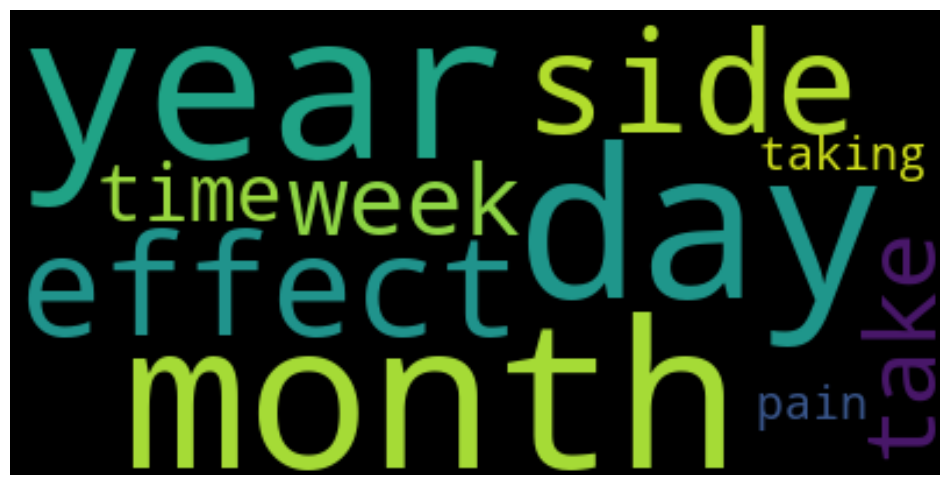

In [56]:
from collections import Counter
positive_reviews = drugrev_train.loc[drugrev_train['ratings_binary'] == 1, 'review']
all_words = " ".join(positive_reviews.str.lower()).split()
most_common_words = Counter(all_words).most_common(10)
reviews_positive = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Convert the list to a string
reviews_string = ' '.join(reviews_positive['Word'])
# Create a word cloud from tweets
wordcloud = WordCloud().generate(reviews_string)

# Visualize the word cloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(reviews_string)
plt.figure(figsize = (12, 9))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### 10. Convert the column of the review to a matrix of token counts using CountVectorizer and unigrams and bigrams

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Convert to matric of token counts
matrix = vectorizer.fit_transform(drugrev_train['review'])
  
# Summarizing the numerical features from texts
print(f'The size of the feature matrix for the texts = {matrix.get_shape()}')
print(f'The first row of the feature matrix = {matrix[0, ]}.')
print(f'There are {matrix[0, ].count_nonzero()}/{matrix.get_shape()[1]} non-zeros')

The size of the feature matrix for the texts = (161297, 1480930)
The first row of the feature matrix =   (0, 1135906)	1
  (0, 386281)	1
  (0, 1251269)	1
  (0, 231141)	1
  (0, 180900)	1
  (0, 477009)	1
  (0, 885350)	1
  (0, 1136123)	1
  (0, 389604)	1
  (0, 1251906)	1
  (0, 231220)	1
  (0, 180941)	1
  (0, 477046)	1.
There are 13/1480930 non-zeros


### 11. Perform the tf-idf analysis on the column of the review using Tfidfvectorizer

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer

# Create a Vectorizer Object with default param
Cvectorizer = CountVectorizer()

# Applying vectorizer
token_count_matrix = Cvectorizer.fit_transform(drugrev_train['review'])

# Create a tf_idf object using default parameters
tf_idf_transformer = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

print(tf_idf_matrix)

  (0, 8052)	0.5247188342778005
  (0, 10688)	0.38416884811982865
  (0, 17622)	0.15544588788743155
  (0, 21222)	0.5466445044765966
  (0, 39582)	0.4483779123213489
  (0, 54137)	0.15647810581429814
  (0, 58653)	0.1690344725077478
  (1, 1456)	0.2437571722985119
  (1, 5421)	0.10788083136082034
  (1, 5445)	0.10069489242180168
  (1, 5576)	0.1050158143487497
  (1, 5614)	0.15467731833260245
  (1, 5959)	0.07182241357325625
  (1, 8152)	0.1218067166832928
  (1, 11035)	0.14184991153677895
  (1, 11957)	0.0803532183593433
  (1, 12279)	0.35837199611568255
  (1, 13242)	0.13722276978122339
  (1, 14993)	0.09254346642145383
  (1, 16024)	0.06475069143629889
  (1, 16279)	0.08189135532470954
  (1, 16737)	0.09705493032696245
  (1, 17641)	0.09847290372872264
  (1, 18222)	0.11715115013024162
  (1, 19278)	0.08318993092229472
  :	:
  (161296, 2250)	0.28743325659082564
  (161296, 7039)	0.20428756577828286
  (161296, 9608)	0.18138531948828898
  (161296, 10740)	0.31015272160276586
  (161296, 11374)	0.1882153717558590

### 12. Find the cosine similarity in review between the 100th and 10,00th tweets

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

# First reate a TfidfVectorizer object
tfidfvectorizer = TfidfVectorizer(use_idf = True, smooth_idf = True, sublinear_tf = False)

# Fit 100th and 1000th lines into matrix
tfidfmatrix = tfidfvectorizer.fit_transform(drugrev_train['review'].iloc[[99, 9999]].astype('U'))

# The same TfidfVectorizer object and matrix will be used from the previous cell
# Compute and print the cosine similarity of the two lines of text using cosine_similarity function
cosim2 = cosine_similarity(tfidfmatrix, dense_output = True)
print(f"The cosine similarity between the 100th and 10000th lines from column review is {cosim2[0,1]}")

The cosine similarity between the 100th and 10000th lines from column review is 0.013443926165547383


### 13. Find the corpus vector equal to the average of all the document vectors, where each document corresponds to a review or a row in this dataset

I do not understand what this portion of the assignment is asking

### 14. Build the first model based on the training dataset using the random forests and pipeline

In [60]:
# Creating features first
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# create features and target
X_train = drugrev_train['review']
y_train = drugrev_train['ratings_binary']

y_train = y_train.astype(int)

# override the string tokenization step while preserving the preprocessing and n-grams generation steps
tfidf_vector = TfidfVectorizer(ngram_range = (1,1))

# support vector machine classifier
classifier = RandomForestClassifier(random_state = 42)

# create pipeline based on the cleaner, vectorizer, and classifier
pipeline = Pipeline([("vectorizer", tfidf_vector),
                    ("classifier", classifier)])

# fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(random_state=42))])

### 15. Check the first model on the test dataset. Is it a good model based on the selected evaluation metrics? Please justify your answer

In [61]:
# Import test set data
drugrev_test = pd.read_csv('/Users/mj/Desktop/DSCI 314 (Text Mining)/DrugReview/drugsComTest_raw.tsv', sep='\t')

In [67]:
# Initialize empty column
drugrev_test['ratings_binary'] = None

# Parse through data and add 1 or 0 to ratings_binary; rating > 5 ratings_binary = 1, rating <= 5 ratings_binary = 0
for index, row in drugrev_test.iterrows():
    if row['rating'] > 5:
        drugrev_test.loc[index, 'ratings_binary'] = 1
    else:
        drugrev_test.loc[index, 'ratings_binary'] = 0

In [68]:
from sklearn.metrics import classification_report
# Displaying classfication report
target_names = ['negative', 'positive']
X_test = drugrev_test['review']
y_test = drugrev_test['ratings_binary']

# predict the test data
y_pred = pipeline.predict(X_test)

# print out the report
print(classification_report(y_test, y_pred, target_names = target_names))

ValueError: Classification metrics can't handle a mix of unknown and binary targets

### 16. Create the second model using pipeline, grid search CV and SVC for the hyperparameters for the estimators

In [70]:

from sklearn.model_selection import GridSearchCV


# specify the hyperparameters using dictionary based on the following format:
# estimator/transformerName__(double underscore) corresponding parameter : potential parameter
parameters = {
    'vectorizer__max_df': (0.5, 1.0),
    'vectorizer__ngram_range': ((1,1), (1,2)), # unigrams or bigrams
    'vectorizer__use_idf': (True, False),
    'classifier__C': (0.5, 1.0)
}

# perform gridsearch CV
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter 'C' for estimator RandomForestClassifier(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

### 18. Generate the first topic model by setting five topics using LDA method and CountVectorizer on the review column

In [72]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english')
# Create document word matrix
document_word_matrix_tf = tf_vectorizer.fit_transform(drugrev_train['review'])

# Specify the number of topics using n_components and fix the seed
lda = LatentDirichletAllocation(n_components= 4 ,random_state= 101)
lda.fit(document_word_matrix_tf)

LatentDirichletAllocation(n_components=4, random_state=101)

In [73]:
topics = lda.transform(document_word_matrix_tf)
topics.shape

# Create a new column
drugrev_train['Topic'] = topics.argmax(axis=1)
drugrev_train['Topic'].value_counts()

Topic
0    61242
3    48718
1    32571
2    18766
Name: count, dtype: int64

### 19. Plot the top 15 words for each topic for the model above

In [74]:
def plot_top_words(model, feature_names, n_top_words, title):
    # We specify 4 topics, then we setup the number of subplot =2*2 
    fig, axes = plt.subplots(2, 2, figsize=(30, 15), sharex=True)
    # Flatten the axes to 1 D vector, then we can loop it easily instead of using a nested loop for rows and columns
    axes = axes.flatten()
    
    # Loop over all the topics
    for topic_idx, topic in enumerate(model.components_):
        # Rank the values and take out the corresponding indices
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # Take out the top features using the indices
        top_features = [feature_names[i] for i in top_features_ind]
        # Get the weights
        weights = topic[top_features_ind]
        # Take out the axes from the flattened 1D vector
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        # Remove the top, right and left axis in matplotlib
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

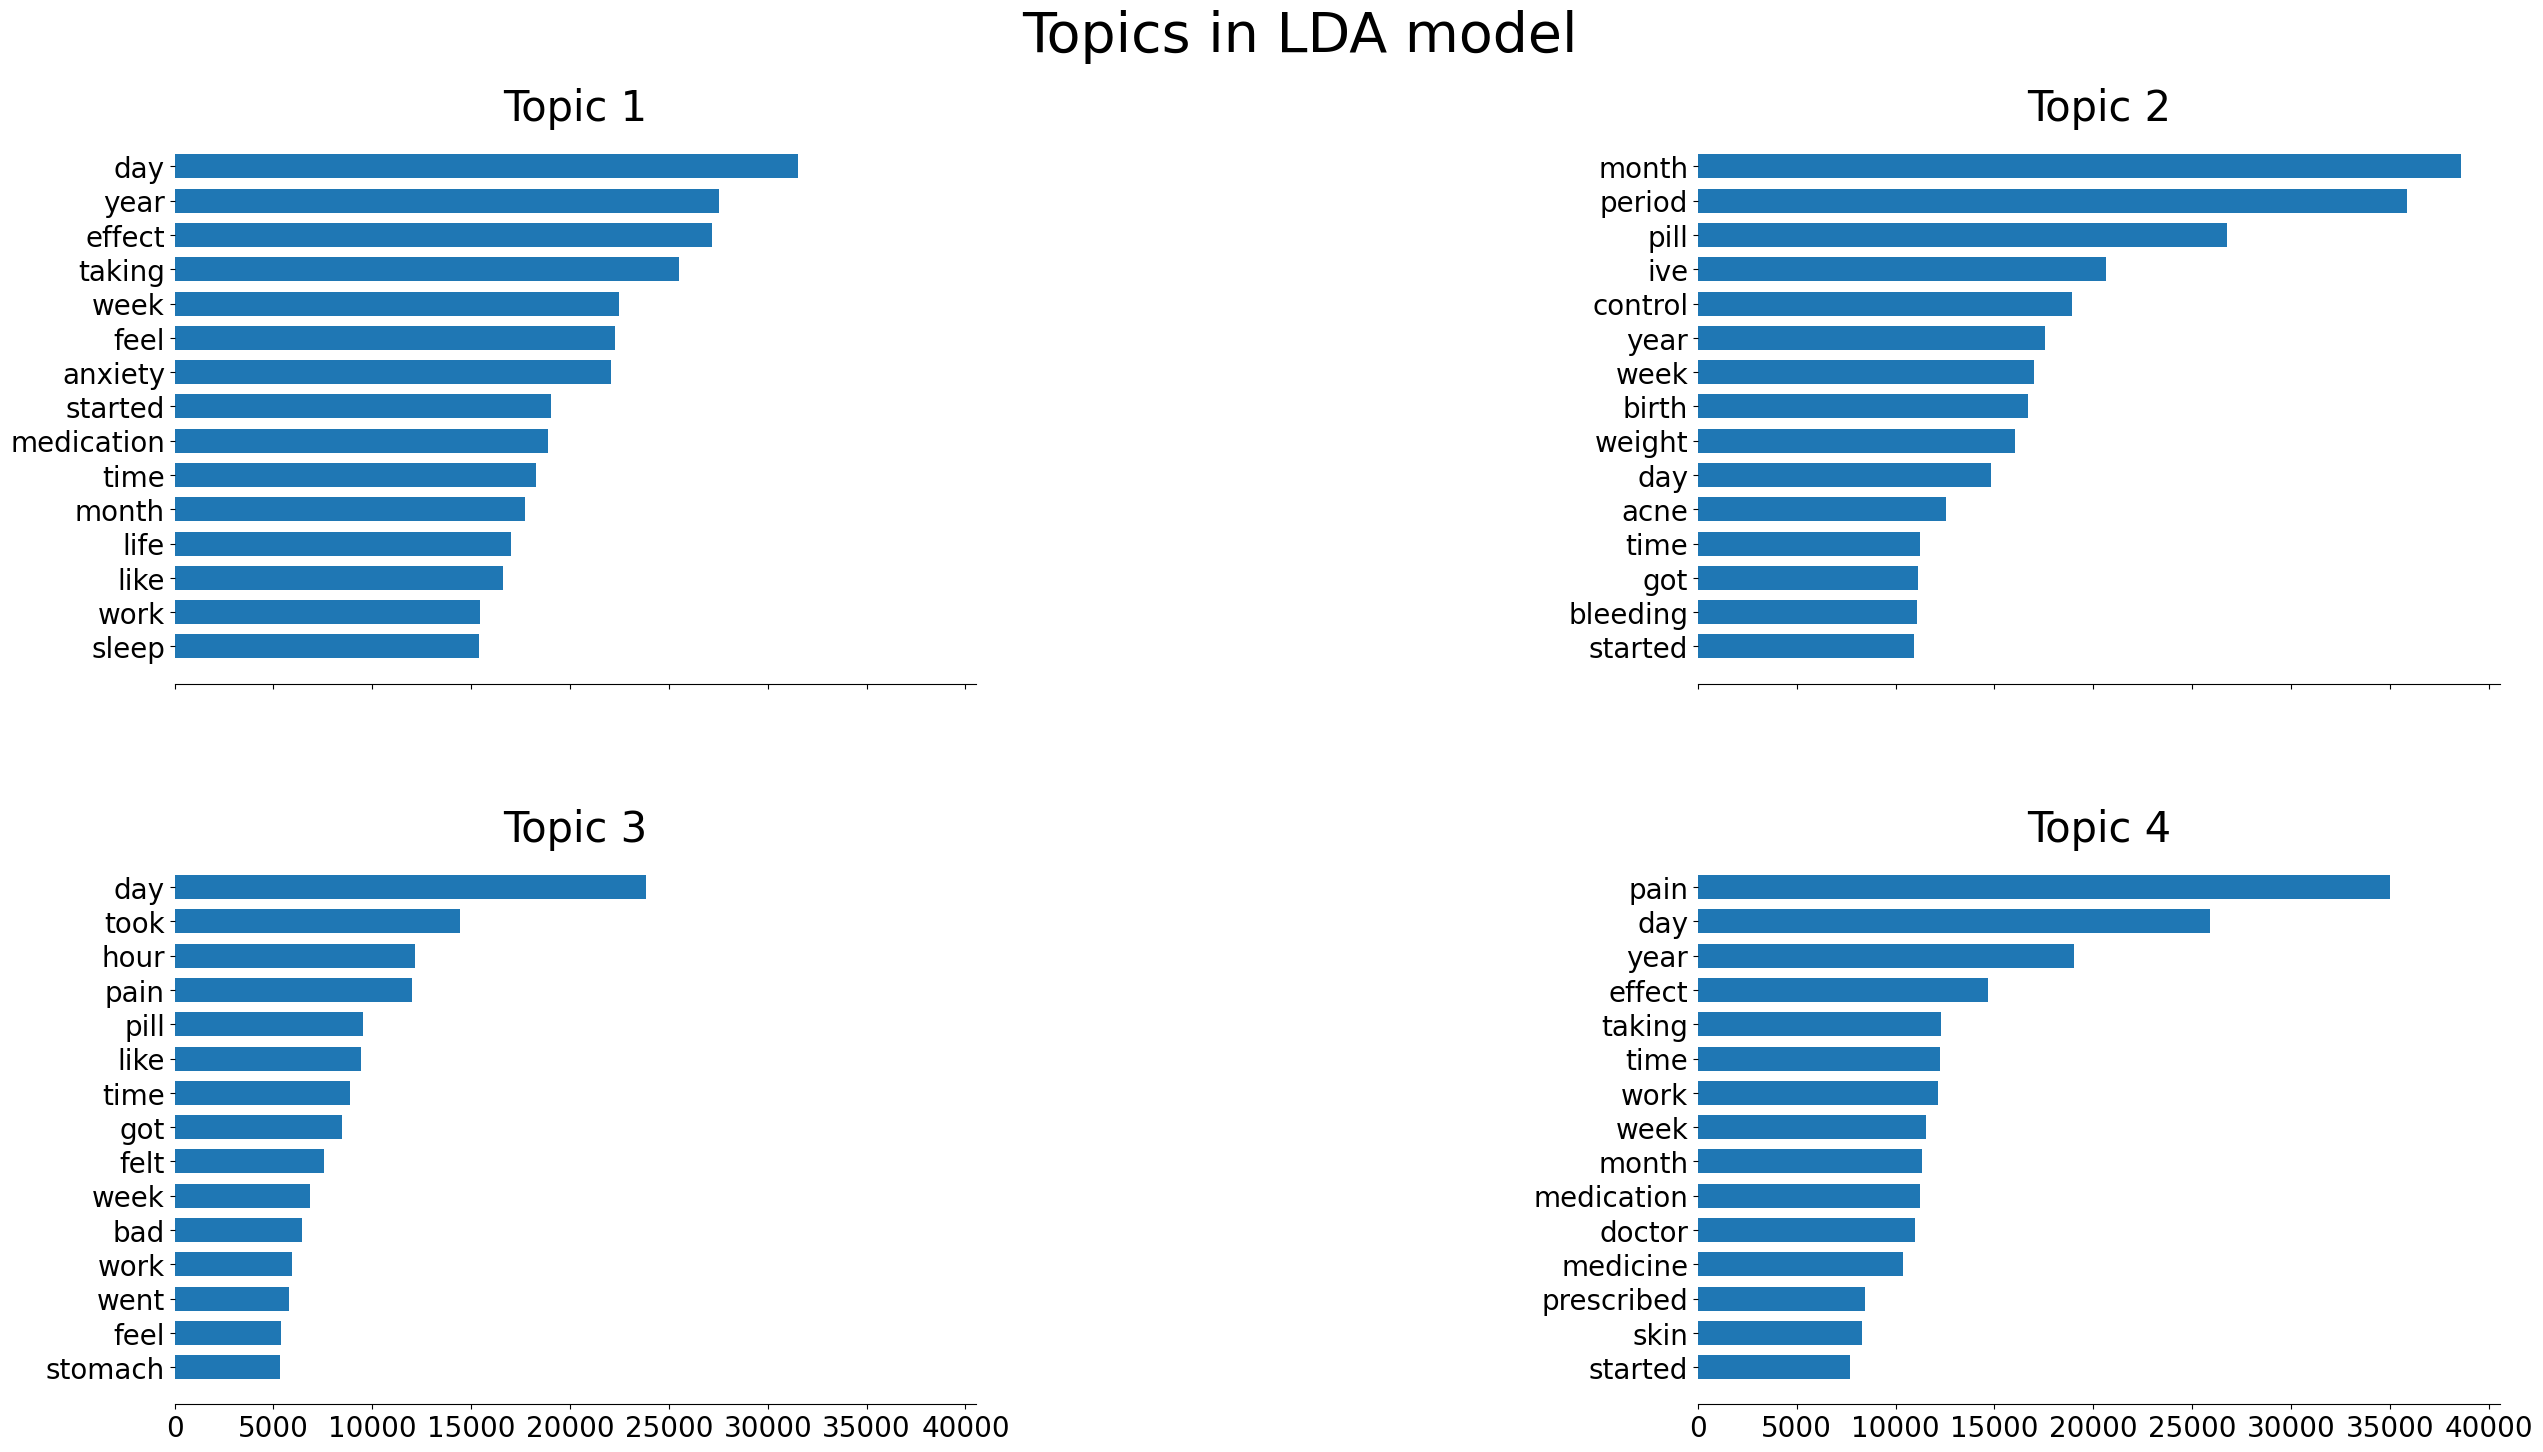

In [78]:
n_top_words = 15 
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model using CountVectorizer')

### 20. Generate the second topic model by setting five topics using LDA method and TfidfVectorizer on the review column

In [90]:
from sklearn.decomposition import LatentDirichletAllocation

# Generate the document word matrix using tfidf
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', # Remove the stop words
                                lowercase = True, # Convert the tokes to lower cases
                                # Specif the token using regular expression to consider tokens of 2 for more alphanumeric characters
                                token_pattern = r'\b[a-zA-Z0-9]{2,}\b', 
                                max_df = 0.9, 
                                min_df = 5)
document_word_matrix_tf_idf = tfidf_vectorizer.fit_transform(drugrev_train['review'])

In [91]:
lda_tf_idf = LatentDirichletAllocation(n_components = 4, random_state= 101)
lda_tf_idf.fit(document_word_matrix_tf_idf)

LatentDirichletAllocation(n_components=4, random_state=101)

### 21. Plot the top 15 words for each topic for the second model above

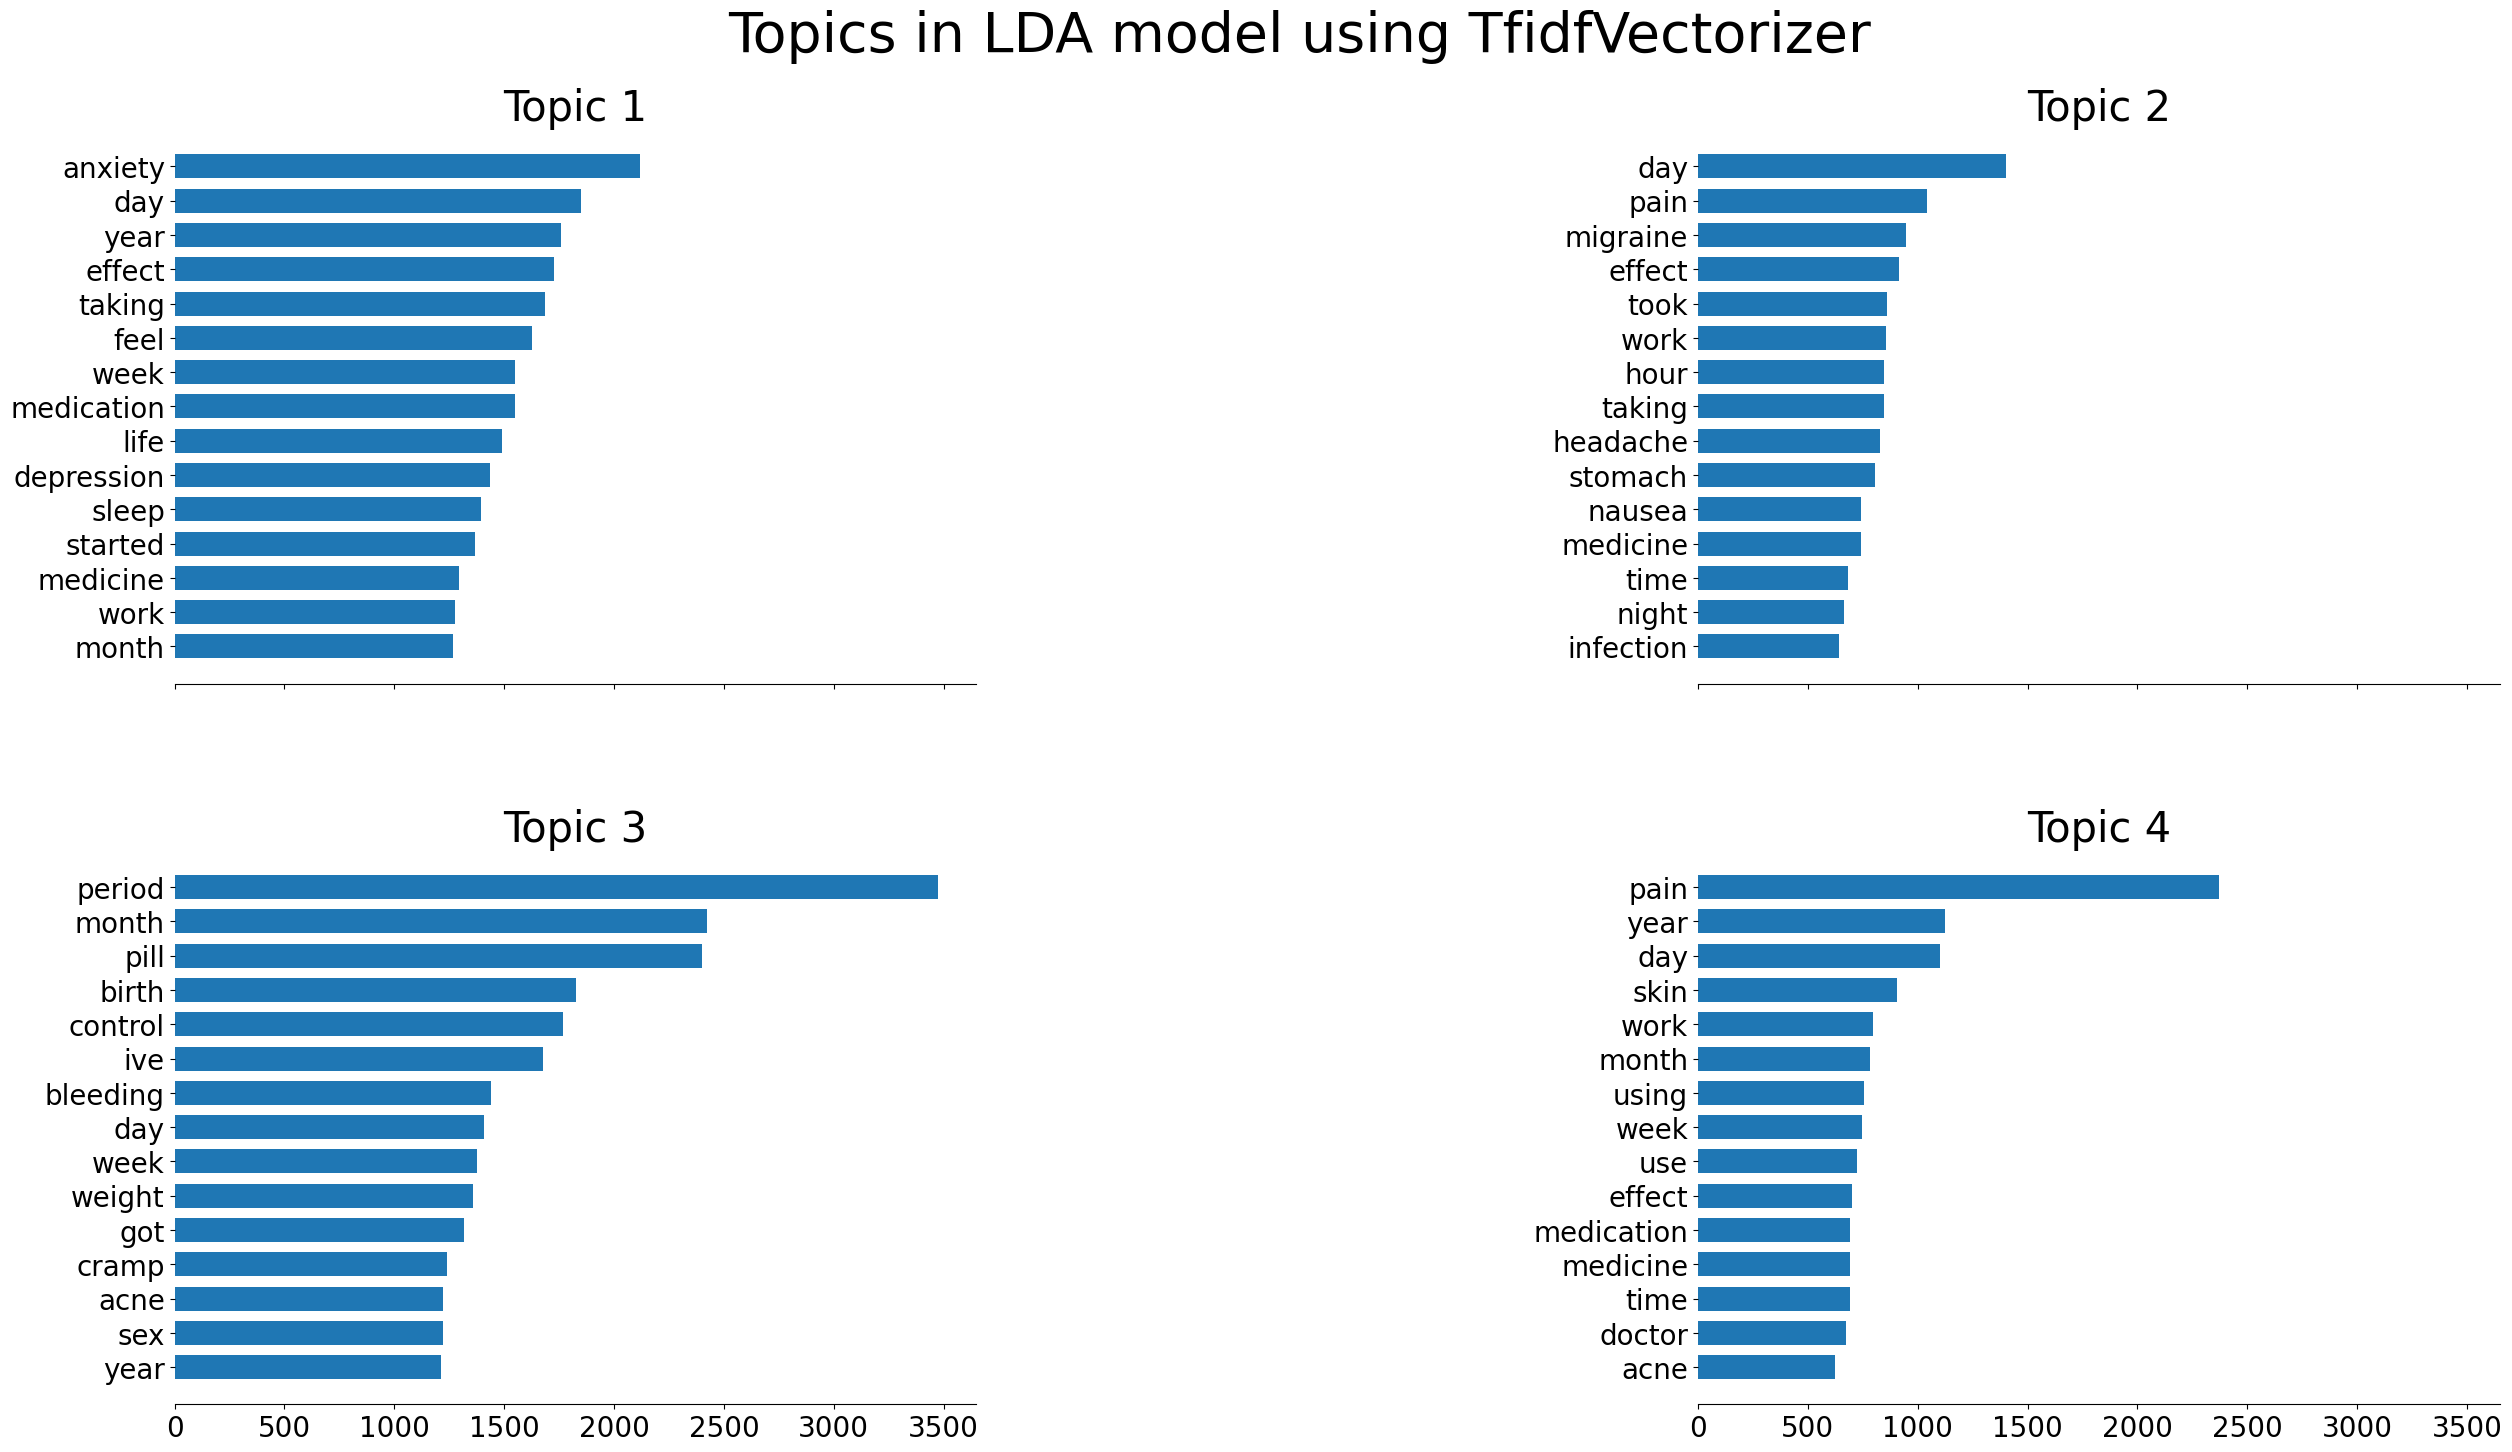

In [92]:
n_top_words = 15 
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda_tf_idf, tf_feature_names, n_top_words, 'Topics in LDA model using TfidfVectorizer')

### 22. Visualize the second topic model using the dimension reduction method

In [96]:
import pyLDAvis
import pyLDAvis.sklearn

# Enable automatic D3 display of prepared model data in the IPython notebook.
pyLDAvis.enable_notebook()

# Visualize topic model with default mds='pcoa'
pyLDAvis.sklearn.prepare(lda_model = lda_tf_idf, dtm = document_word_matrix_tf_idf, vectorizer = tfidf_vectorizer)

ModuleNotFoundError: No module named 'pyLDAvis'